In [17]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.manifold import TSNE
from sklearn.datasets import fetch_openml
from sklearn_extra.cluster import KMedoids
import pandas as pd
import gower

In [18]:
X, y = fetch_openml('mnist_784', version=1, return_X_y=True, as_frame=False)

/home/guillemin/.local/lib/python3.9/site-packages/sklearn/datasets/_openml.py:1002: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


In [19]:
X = X[:2500]
y = y[:2500]

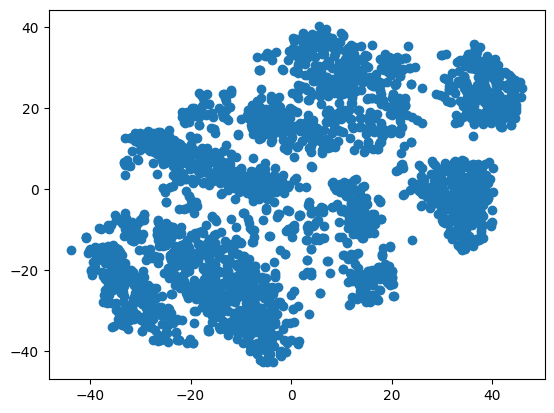

In [20]:
tsne = TSNE(n_components=2, perplexity=50)
embedding = tsne.fit_transform(X)
plt.scatter(embedding[:,0], embedding[:,1])
plt.show()

In [21]:
dist_matrix = gower.gower_matrix(embedding)
kmedoids = KMedoids(n_clusters=10, metric='precomputed').fit(dist_matrix)
labels = kmedoids.predict(dist_matrix)

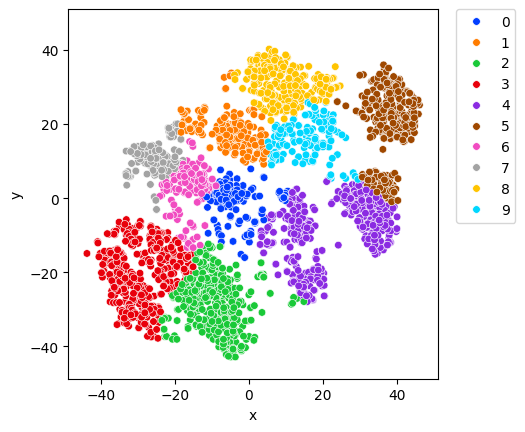

In [22]:
embedding_df = pd.DataFrame({'x': embedding[:, 0], 'y': embedding[:, 1], 'label': labels})
fig, ax = plt.subplots(1)
sns.color_palette("bright")
sns.scatterplot(x="x", y="y", data=embedding_df, hue='label', ax=ax, s=30, palette=sns.color_palette('bright', n_colors=nb_clusters))

lim = (embedding.min()-5, embedding.max()+5)
ax.set_xlim(lim)
ax.set_ylim(lim)
ax.set_aspect('equal')
ax.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.0)